<a href="https://colab.research.google.com/github/fighaz/PCVK_2024/blob/main/Week10PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.

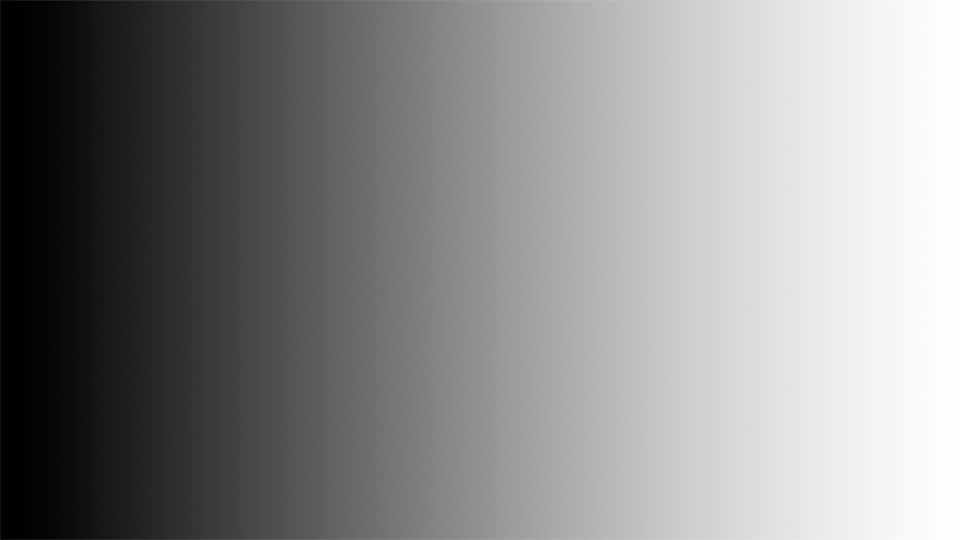

In [46]:
img = cv.imread('/content/drive/MyDrive/PCVK/gradient.jpg',0)
cv2_imshow(img)

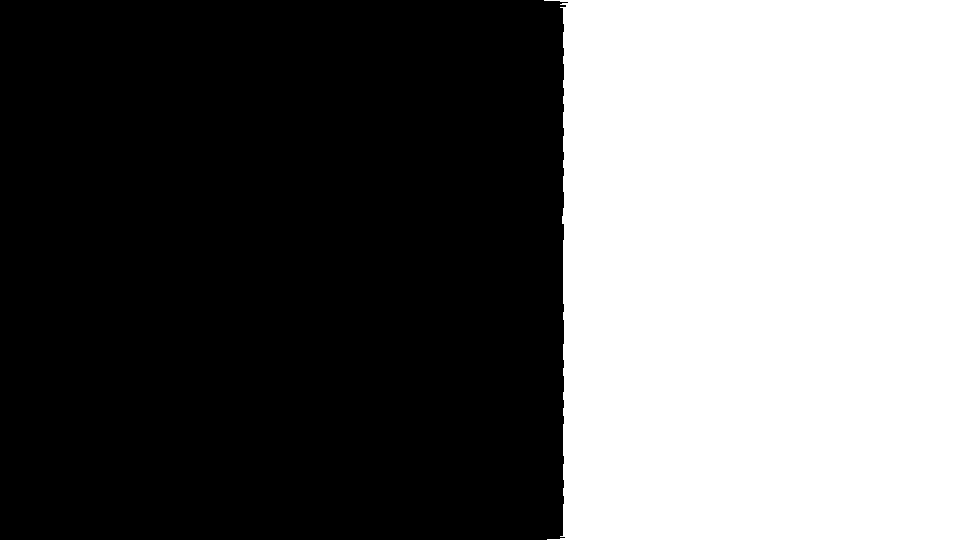

In [47]:

def binary(img,thres):
    img_binary = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] > thres:
                img_binary[i,j] = 255
            else:
                img_binary[i,j] = 0
    return img_binary

img_binary = binary(img,170)
cv2_imshow(img_binary)


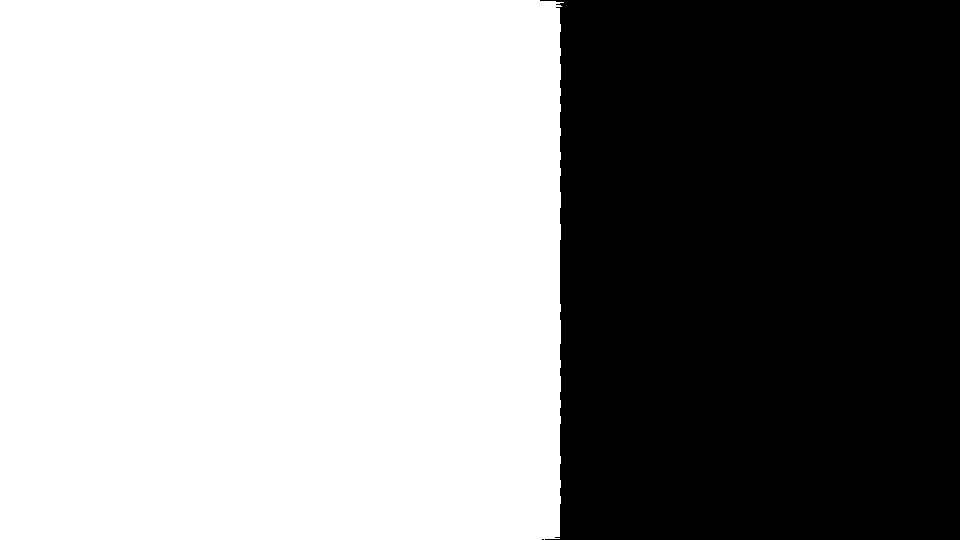

In [49]:
def binaryinv(img,thres):
    img_binaryinv = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] < thres:
                img_binaryinv[i,j] = 255
            else:
                img_binaryinv[i,j] = 0
    return img_binaryinv

img_binary = binaryinv(img,170)
cv2_imshow(img_binary)

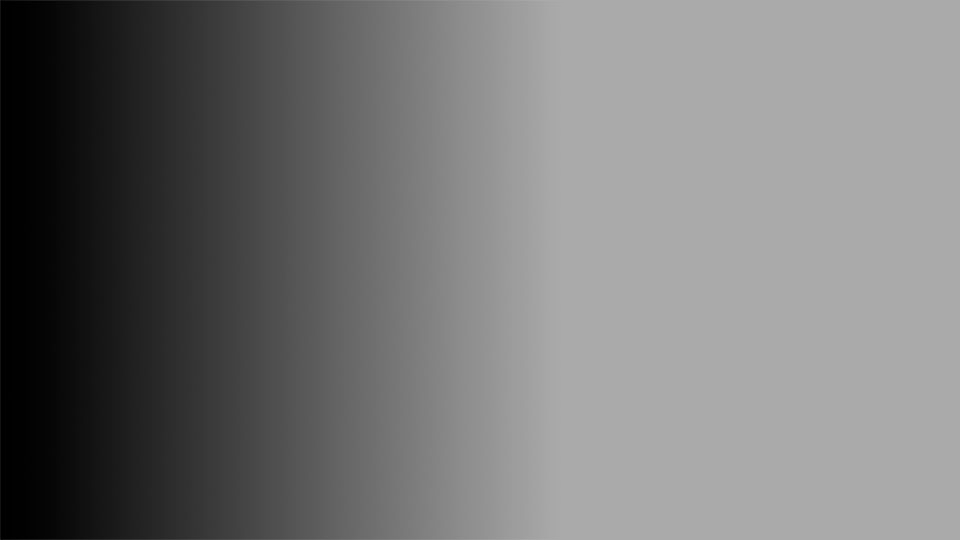

In [50]:
def trunc(img,tresh):
    img_trunc = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] > tresh:
                img_trunc[i,j] = tresh
            else:
                img_trunc[i,j] = img[i,j]
    return img_trunc

img_trunc = trunc(img,170)
cv2_imshow(img_trunc)

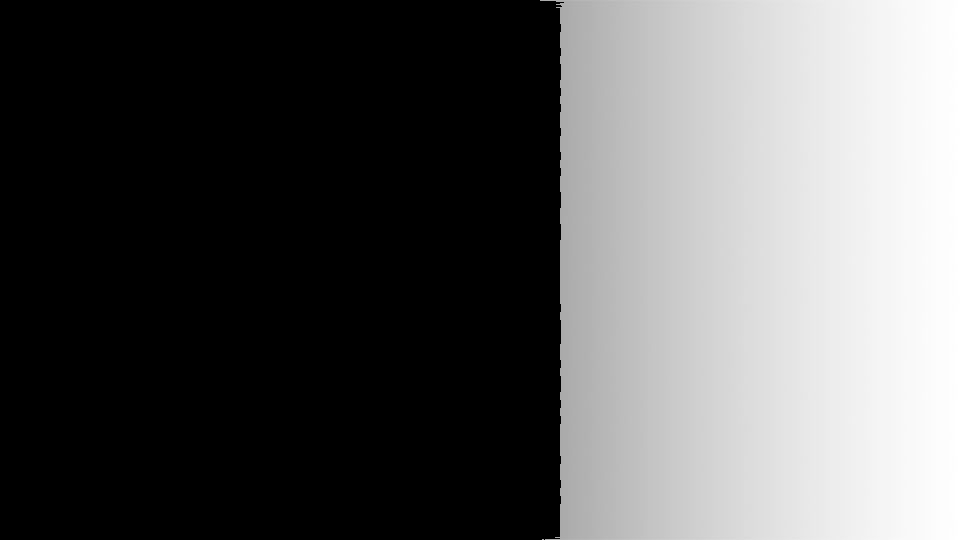

In [51]:
def tozero(img,tresh):
    img_tozero = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] < tresh:
                img_tozero[i,j] = 0
            else:
                img_tozero[i,j] = img[i,j]
    return img_tozero

img_tozero = tozero(img,170)
cv2_imshow(img_tozero)

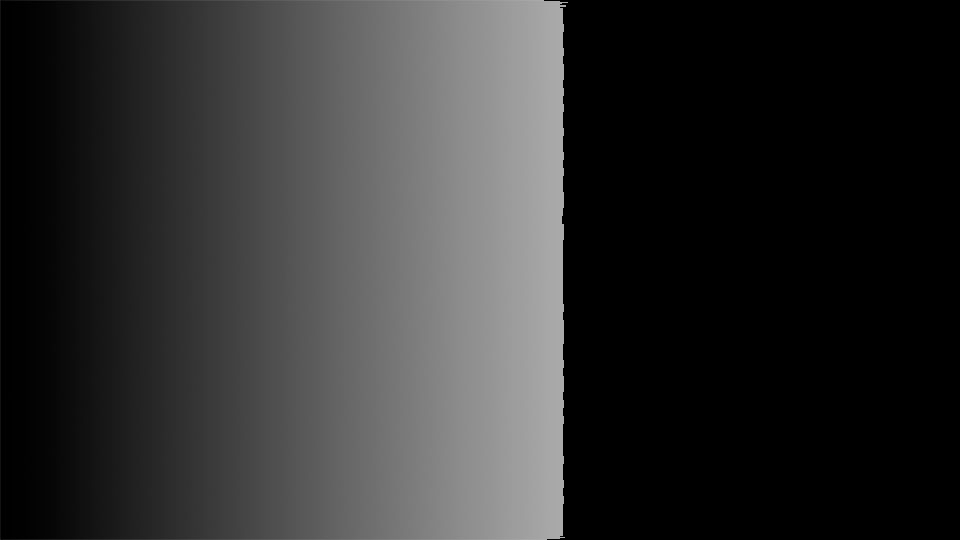

In [52]:
def tozero_inv(img,tresh):
    img_tozero_inv = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] > tresh:
                img_tozero_inv[i,j] = 0
            else:
                img_tozero_inv[i,j] = img[i,j]
    return img_tozero_inv

img_tozero_inv = tozero_inv(img,170)
cv2_imshow(img_tozero_inv)

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

In [53]:
img_bl = cv.imread('/content/drive/MyDrive/PCVK/balloon.jpg',0)

In [59]:
def otsu_threshold(image):
    # Menghitung histogram gambar
    histogram, bins = np.histogram(image, bins=256, range=[0, 256])

    # Menghitung probabilitas setiap intensitas piksel
    prob = histogram / np.sum(histogram)

    # Menginisialisasi variabel untuk Otsu Thresholding
    max_variance = 0
    optimal_threshold = 0

    for t in range(256):
        # Probabilitas dua kelas (foreground dan background)
        w0 = np.sum(prob[:t])  # Background
        w1 = np.sum(prob[t:])  # Foreground
        if w0 == 0 or w1 == 0:
            continue
        # Rata-rata dua kelas
        mean0 = np.sum(np.arange(0, t) * prob[:t]) / w0  # Background
        mean1 = np.sum(np.arange(t, 256) * prob[t:]) / w1  # Foreground

        # Variansi antar kelas
        variance_between = w0 * w1 * (mean0 - mean1) ** 2

        # Mencari variansi maksimal
        if variance_between > max_variance:
            max_variance = variance_between
            optimal_threshold = t

    return optimal_threshold

otsu_image = binary(img_bl,otsu_threshold(img_bl))

Text(0.5, 1.0, 'Otsu Thresholding')

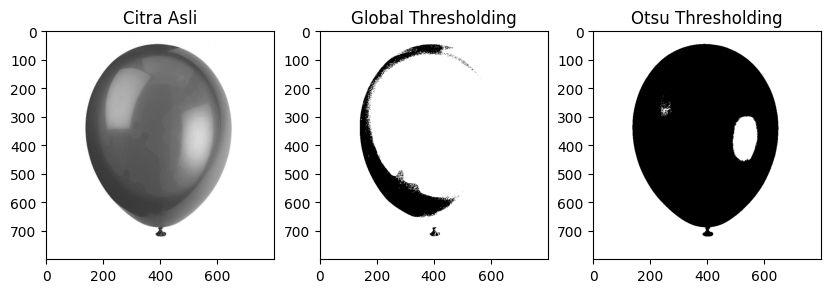

In [61]:
global_tresh = binary(img_bl,90)
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(img_bl,cmap='gray')
plt.title('Citra Asli')
plt.subplot(1,3,2)
plt.imshow(global_tresh,cmap='gray')
plt.title('Global Thresholding')
plt.subplot(1,3,3)
plt.imshow(otsu_image,cmap='gray')
plt.title('Otsu Thresholding')

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.
Petunjuk:

  a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.

  b. Buka link berikut https://opencv-
  tutorial.readthedocs.io/en/latest/histogram/histogram.html
  
  c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
  yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
  histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
  dimasking warna putih yang akan dihitung histogramnya (dari contoh
  dibawah dinamakan dengan Citra Segment)



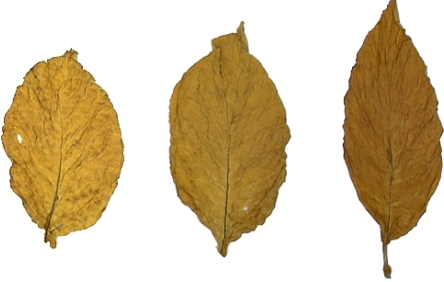

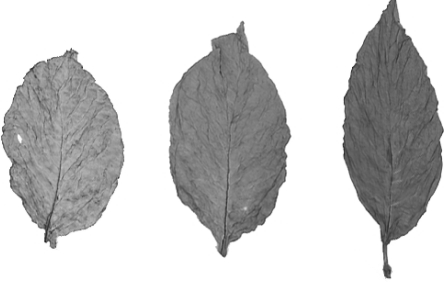

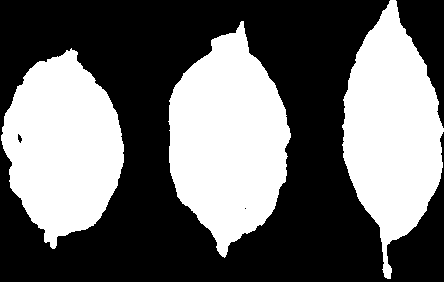

In [88]:
img_tbc_ori = cv.imread('/content/drive/MyDrive/PCVK/tobacco.jpg')
img_tbc_gray = cv.cvtColor(img_tbc_ori,cv.COLOR_BGR2GRAY)
cv2_imshow(img_tbc_ori)
cv2_imshow(img_tbc_gray)
_, img_mask = cv.threshold(img_tbc_gray,200,255,cv.THRESH_BINARY_INV)
cv2_imshow(img_mask)

In [76]:
print(img_mask.shape)
print(img_tbc_gray.shape)

(282, 444)
(282, 444)


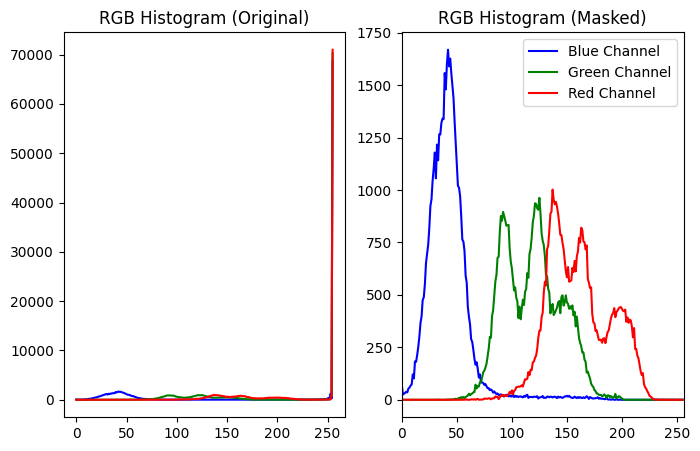

In [91]:
# Pisahkan gambar menjadi channel B, G, R
b, g, r = cv.split(img_tbc_ori)
# Hitung histogram Ori
hist_ori_b = cv.calcHist([b], [0], None, [256], [0, 256])
hist_ori_g = cv.calcHist([g], [0], None, [256], [0, 256])
hist_ori_r = cv.calcHist([r], [0], None, [256], [0, 256])
# Hitung histogram untuk setiap channel dengan menggunakan mask
hist_b = cv.calcHist([b], [0], img_mask, [256], [0, 256])
hist_g = cv.calcHist([g], [0], img_mask, [256], [0, 256])
hist_r = cv.calcHist([r], [0], img_mask, [256], [0, 256])

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.title("RGB Histogram (Original)")
plt.plot(hist_ori_b, color='b', label='Blue Channel')   # Histogram channel Biru
plt.plot(hist_ori_g, color='g', label='Green Channel')  # Histogram channel Hijau
plt.plot(hist_ori_r, color='r', label='Red Channel')    # Histogram channel Merah

plt.subplot(1,2,2)
plt.title("RGB Histogram (Masked)")
plt.plot(hist_b, color='b', label='Blue Channel')   # Histogram channel Biru
plt.plot(hist_g, color='g', label='Green Channel')  # Histogram channel Hijau
plt.plot(hist_r, color='r', label='Red Channel')    # Histogram channel Merah

# t batas sumbu x dari 0 sampai 256
plt.xlim([0, 256])
# Tambahkan legend agar kita bisa melihat channel mana yang mana
plt.legend()
# Tampilkan plot
plt.show()

6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang
kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

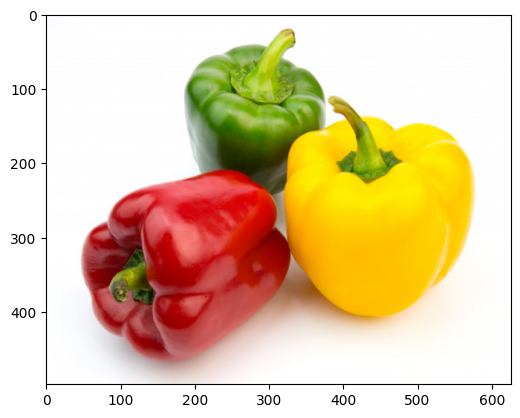

In [139]:
img_pepper = cv.imread('/content/drive/MyDrive/PCVK/peppers.jpg')
img_pepper = cv.cvtColor(img_pepper,cv.COLOR_BGR2RGB)
plt.imshow(img_pepper)

In [144]:
from sklearn.cluster import KMeans
#reshape array ke bentuk 2D
pixel_values = img_pepper.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 5
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img_pepper.shape)

In [145]:
masked_image = np.copy(img_pepper)
# konvert ke bentuk vektor
masked_image = masked_image.reshape((-1, 3))
# cluster yang diubah
masked_image[labels == 4] = [255,255,255]
masked_image[labels == 2] = [255,255,255]
masked_image[labels == 3] = [255,255,255]
masked_image[labels == 1] = [255,255,255]
# konvert ke bentuk asli
masked_image = masked_image.reshape(img_pepper.shape)


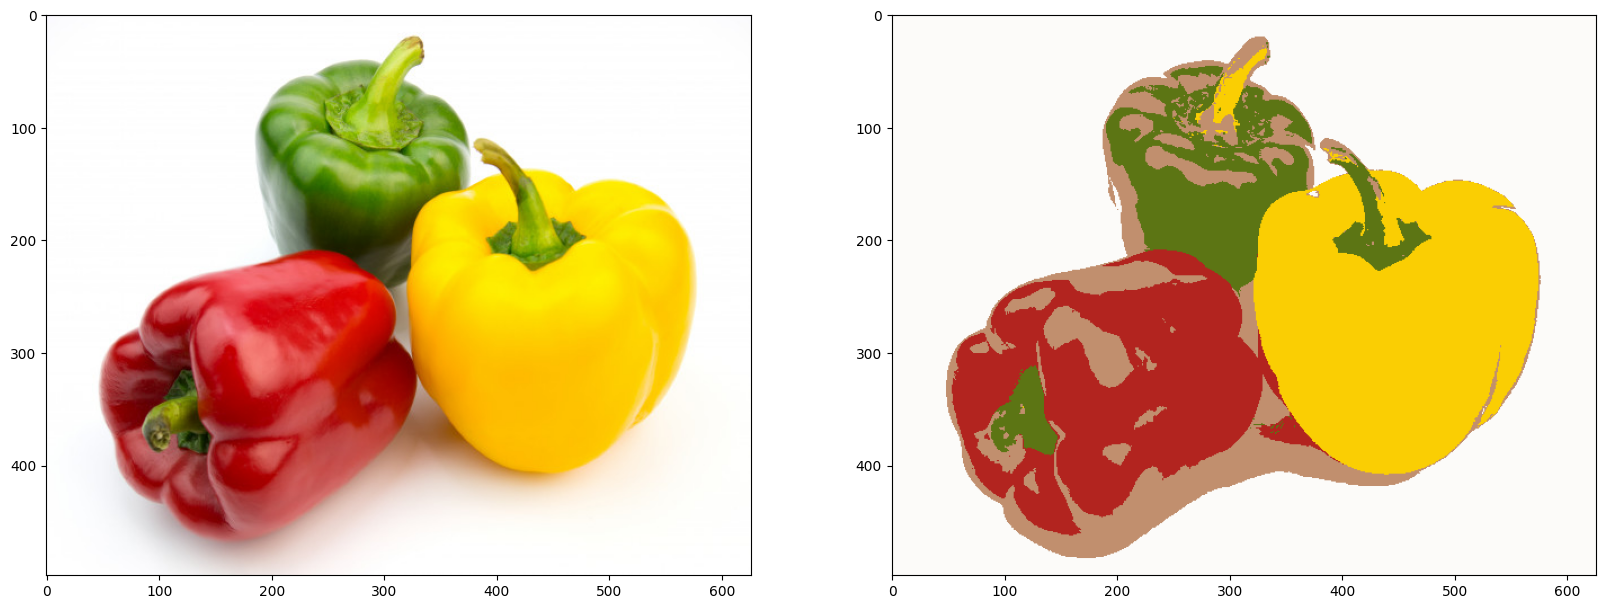

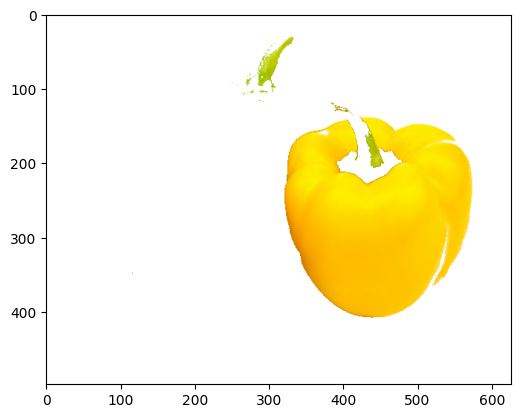

In [146]:
plt.figure(figsize = (20,12))
plt.subplot(1,2,1),plt.imshow(img_pepper)
plt.subplot(1,2,2),plt.imshow(segmented_image)
plt.show()
plt.imshow(masked_image)

Kendalah Yang dihadapi adalah susah untuk menentukan cluster yang tepat

7. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda
pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code
dan hasil image di modul ini.

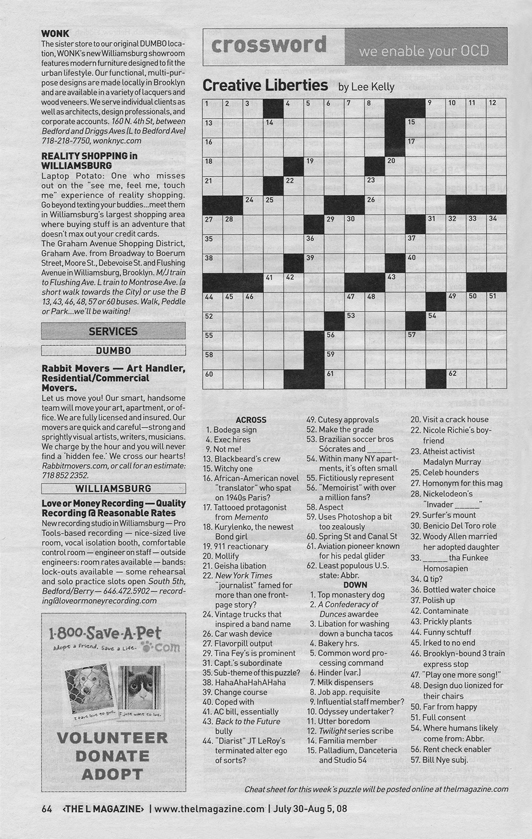

In [147]:
img_crossword = cv.imread('/content/drive/MyDrive/PCVK/crossword.jpg',0)
cv2_imshow(img_crossword)

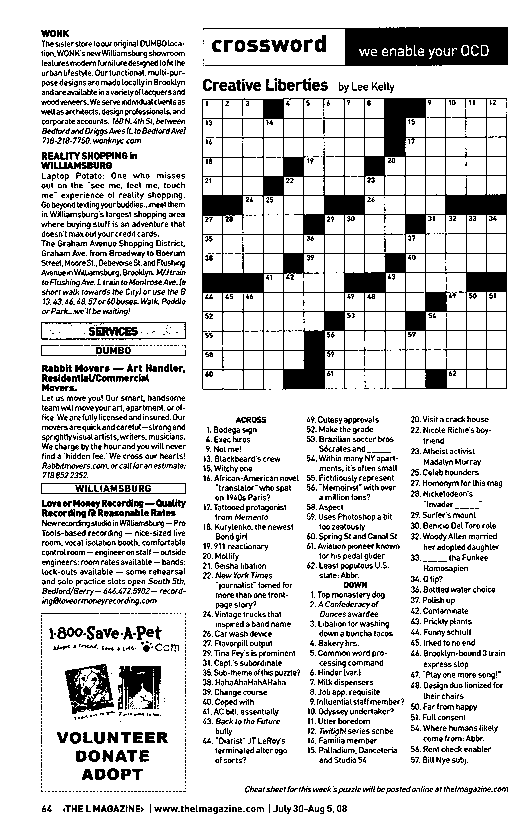

In [149]:
res,thres = cv.threshold(img_crossword,127,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
cv2_imshow(thres)